In [1]:
%matplotlib inline

import sys
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

sys.path.append("../pycommon")
from pps_tools import set_cartopy_gridlines, set_cartopy_colorbar


 

In [2]:
%ls nudging_utils

OISSS_L4_multimission_global_monthly_v1.0_2014-01.nc
OISSS_L4_multimission_global_monthly_v1.0_2014-01.nc.html
SMAP_L2B_SSS_36950_20220101T005200_R18240_V5.0.h5
SMAP_L3_SSS_20220105_8DAYS_V5.0.nc
WOA05_pottemp_salt.nc
flood_salt_restore_PHC2.1440x1080.v20180405.nc
iced_ocean_topog2.nc
ocean_static.nc
ocean_topog.nc


In [3]:
# read in the output grid & the land/ocean mask

fn_grd_out = 'nudging_utils/flood_salt_restore_PHC2.1440x1080.v20180405.nc'
f = Dataset(fn_grd_out)
lat2d_grd_out = f.variables['lat'][:]
lon2d_grd_out = f.variables['lon'][:]
sss_grd_out = f.variables['SALT'][:]
f.close()


fn_mask = 'nudging_utils/ocean_topog.nc'
f = Dataset(fn_mask)
wet = f.variables['wet'][:]
f.close()


print("lat2d_grd_out: shape, min, max=",lat2d_grd_out.shape, np.min(lat2d_grd_out), np.max(lat2d_grd_out))
print("lon2d_grd_out: shape, min, max=",lon2d_grd_out.shape, np.min(lon2d_grd_out), np.max(lon2d_grd_out))
print("sss: shape, min, max=",sss_grd_out.shape, np.min(sss_grd_out), np.max(sss_grd_out))
print("sss: shape, min, max=",wet.shape, np.min(wet), np.max(wet))




lat2d_grd_out: shape, min, max= (1080, 1440) -81.60305 89.93877
lon2d_grd_out: shape, min, max= (1080, 1440) -299.99948 60.03369
sss: shape, min, max= (12, 1080, 1440) 3.297 41.3968
sss: shape, min, max= (1080, 1440) 0.0 1.0


Text(0.5, 1.0, 'grid_out')

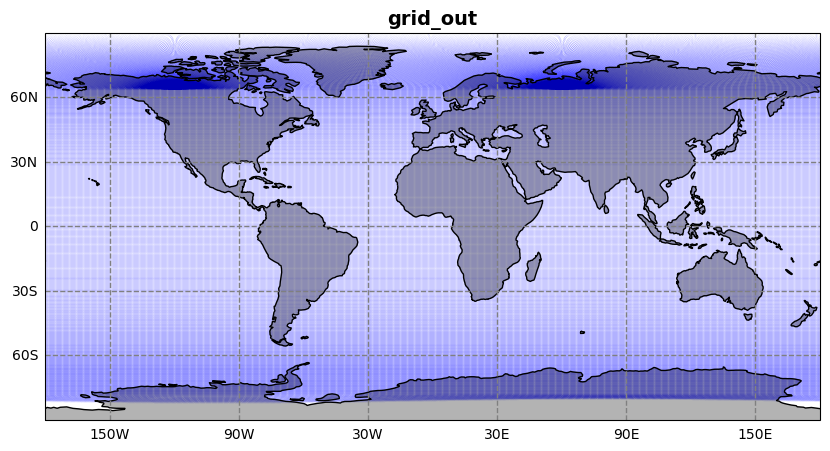

In [4]:
# plot the tripolar grids globally, note the dense grids above 65N.

fig3  = plt.figure(figsize=(10,8))
ax3 = fig3.add_subplot(111,projection=ccrs.PlateCarree())
crs=ccrs.PlateCarree()

ax3.scatter(lon2d_grd_out,lat2d_grd_out,c=[[0,0,1]],marker='o',s=0.0001,transform=crs)
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax3,crs=crs)

ax3.set_title('grid_out',fontsize=14,fontweight='heavy')

Text(0.5, 1.0, 'grid_out')

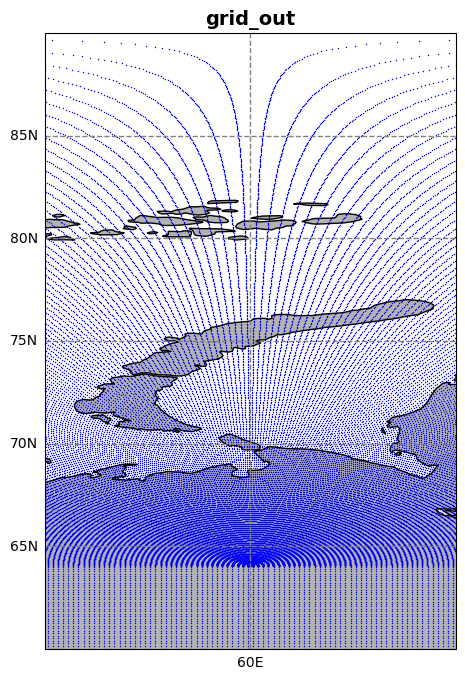

In [5]:
## zoom in the tripolar grids over 60N 

fig4  = plt.figure(figsize=(10,8))
#ax4 = fig4.add_subplot(111,projection=ccrs.Robinson())
ax4 = fig4.add_subplot(111,projection=ccrs.PlateCarree())
crs=ccrs.PlateCarree()

ax4.set_extent([50, 70, 60, 90], crs)



ax4.scatter(lon2d_grd_out[::1],lat2d_grd_out[::1],marker='d',s=0.01, c=[[0,0,1]],transform=crs)
ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax4,crs=crs,
                      xtick=np.arange(-90,90+10,10),
                      ytick=np.arange(-180,180+10,5))


ax4.set_title('grid_out',fontsize=14,fontweight='heavy')

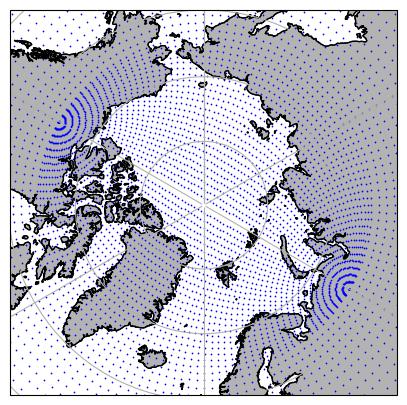

In [6]:
# show tripolar grids in the polar region

plt.figure(figsize=(6, 5))
ax5 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
crs=ccrs.PlateCarree()
ax5.coastlines(linewidth=0.75, color='black', resolution='50m')
ax5.gridlines(crs=crs, linestyle='-')
ax5.set_extent([-180, 180, 60, 90], crs=crs)

nskip = 10
ax5.scatter(lon2d_grd_out[::nskip,::nskip],lat2d_grd_out[::nskip,::nskip],s=0.1,c=[[0,0,1]],marker='d',transform=crs)
ax5.add_feature(cfeature.COASTLINE)
ax5.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])


Text(0.5, 1.0, 'SSS (unit: psu)')

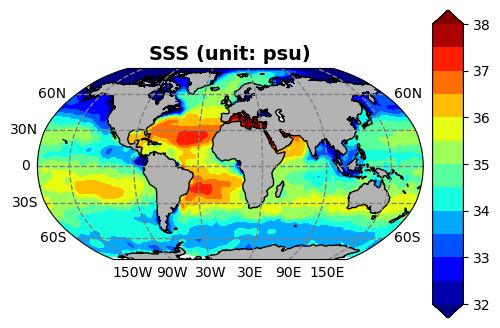

In [7]:
# plot the global SSS fields with land masked out

fig  = plt.figure(figsize=(6,4))

ax   = fig.add_subplot(111,projection=ccrs.Robinson())
crs = ccrs.PlateCarree()

sss_1mon = sss_grd_out[0,:,:]
sss_1mon[wet < 1] = np.nan
    

surf = ax.contourf(lon2d_grd_out, lat2d_grd_out, sss_1mon, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
#surf = ax.contourf(lon2d, lat2d, sss[:,:], extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax,surf,fig,shrink=1)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax,crs=crs)

ax.set_title('SSS (unit: psu)',fontsize=14,fontweight='heavy')


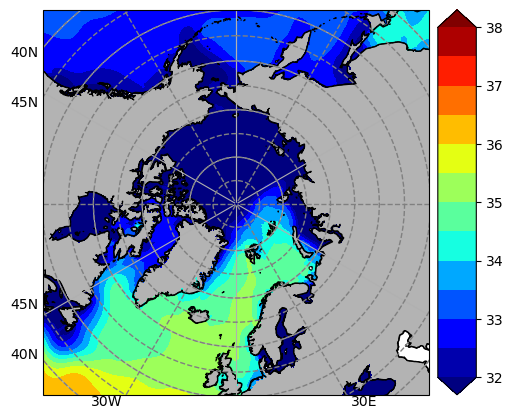

In [8]:
# plot masked SSS in the polar region above 50N
fig6 = plt.figure(figsize=(6, 5))
ax6 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
crs = ccrs.PlateCarree()
ax6.coastlines(linewidth=0.75, color='black', resolution='50m')
ax6.gridlines(crs=ccrs.PlateCarree(), linestyle='-')
ax6.set_extent([-180, 180, 50, 90], crs=crs)

surf6 = ax6.contourf(lon2d_grd_out, lat2d_grd_out, sss_1mon, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax6,surf6,fig6,shrink=1)

ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax6,crs=crs,ytick=np.arange(-90,90+10,5))




